[[1 0]
 [0 1]]


<IPython.core.display.Javascript object>


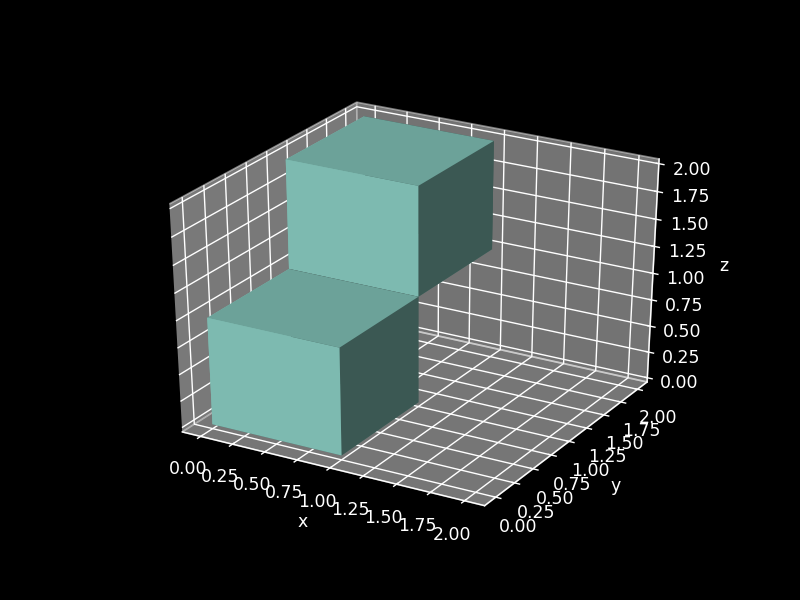

In [240]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

arr = np.array([[[1,0],[0,1]],[[0,0],[0,0]]])
print(arr[0])

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(arr)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

<IPython.core.display.Javascript object>


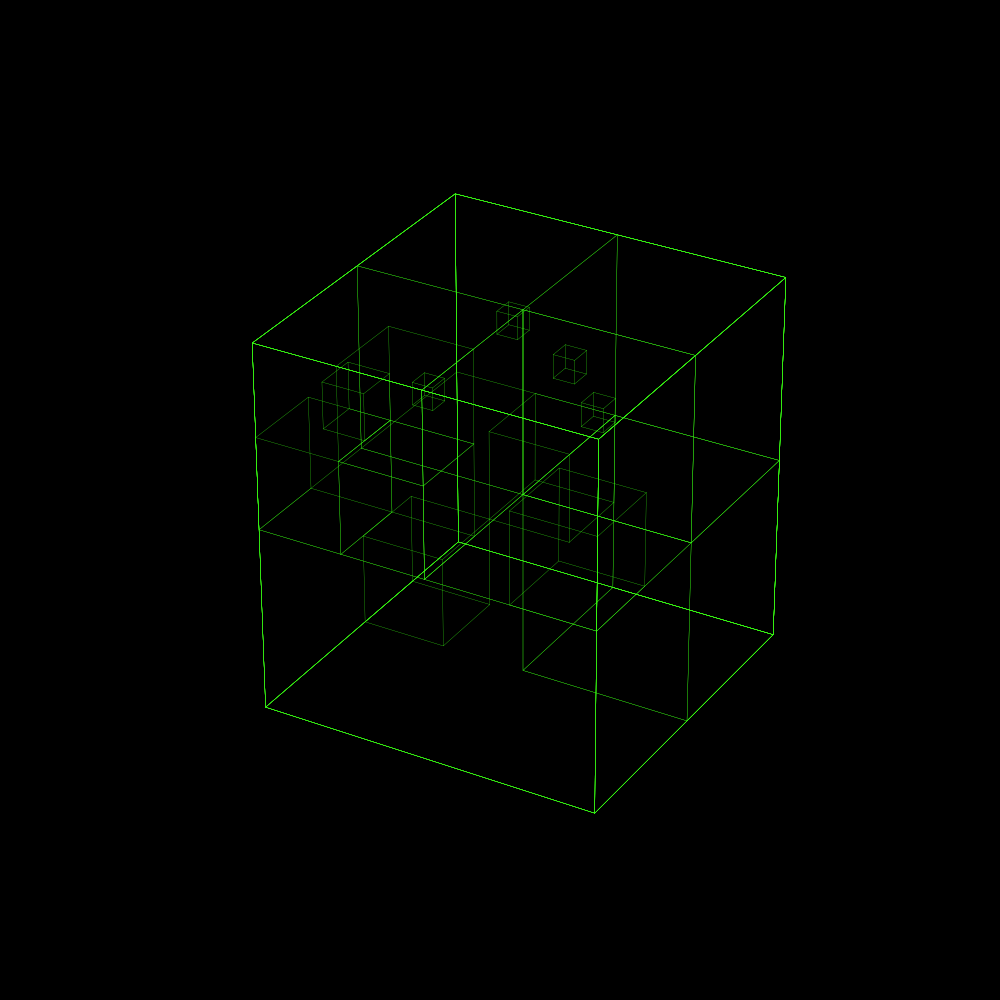

In [2]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations

plt.style.use('dark_background')

def remove_axes(ax):
    #remove panes
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    #remove ticks and ticklabels
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    ax.axes.get_zaxis().set_ticks([])

    #remove spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    #remove grid
    ax.grid(False)

class myobj:
    def __init__(self, L, midR):
        self.L = L
        self.midR = midR

def lat2grid(k, n):
    return 1 / 2 ** k *(n + 1 / 2) - 1 / 2

obj = []

Ncells = 25
maxscale = 300
maxdepth = 5

#randomly generate cells
for i in range(Ncells):
    k = np.random.randint(0, maxdepth)
    
    #get lattice coords
    nx = np.random.choice(list(range(2 ** k)))
    ny = np.random.choice(list(range(2 ** k)))
    nz = np.random.choice(list(range(2 ** k)))

    #get coords
    x = maxscale * lat2grid(k, nx)
    y = maxscale * lat2grid(k, ny)
    z = maxscale * lat2grid(k, nz)

    midR = np.array([x, y, z])
    obj += [myobj(maxscale / 2 ** k, midR)]

#draw cells
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
remove_axes(ax)

for o in obj:
    L = o.L
    midR = o.midR
    r_cell = [-L/2, L/2]
    for s, e in combinations(np.array(list(product(r_cell, r_cell, r_cell)) + midR), 2):
        if np.sum(np.abs(s-e)) == r_cell[1]-r_cell[0]:
            ax.plot3D(*zip(s, e), color=(.224, 1, .078 , 1), linewidth=0.2)
            #ax.scatter(*midR, color="red")
plt.show()

<IPython.core.display.Javascript object>


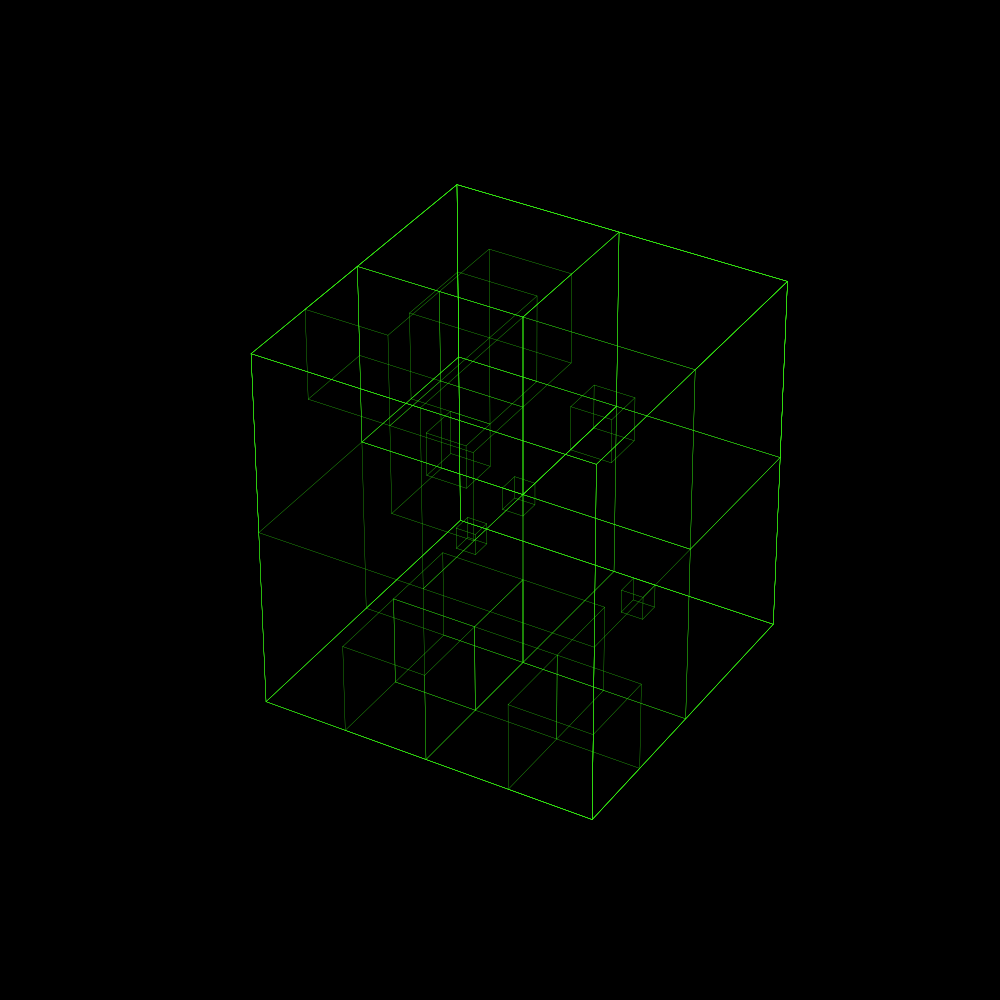

In [5]:
def plot_linear_cube(ax, midR, L, color=(.224, 1, .078 , 1)):
    x, y, z = midR - L / 2
    dx, dy, dz = [L]*3

    xx = [x, x, x+dx, x+dx, x]
    yy = [y, y+dy, y+dy, y, y]
    kwargs = {'alpha': 1, 'color': color, 'linewidth': 0.2}
    ax.plot3D(xx, yy, [z]*5, **kwargs)
    ax.plot3D(xx, yy, [z+dz]*5, **kwargs)
    ax.plot3D([x, x], [y, y], [z, z+dz], **kwargs)
    ax.plot3D([x, x], [y+dy, y+dy], [z, z+dz], **kwargs)
    ax.plot3D([x+dx, x+dx], [y+dy, y+dy], [z, z+dz], **kwargs)
    ax.plot3D([x+dx, x+dx], [y, y], [z, z+dz], **kwargs)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
remove_axes(ax)

#plot cells
for o in obj:
    L = o.L
    midR = o.midR
    plot_linear_cube(ax, midR, L)
plt.show()

# 3D disk rotation

In [3]:
import numpy as np

#rotation around x axis
def Rx(θ):
    return np.array([[1, 0, 0],
                     [0, np.cos(θ), -np.sin(θ)],
                     [0, np.sin(θ), np.cos(θ)]])

#rotation around y axis
def Ry(θ):
    return np.array([[np.cos(θ), 0, np.sin(θ)],
                     [0, 1, 0],
                     [-np.sin(θ), 0, np.cos(θ)]])

#rotation around z axis
def Rz(θ):
    return np.array([[np.cos(θ), -np.sin(θ), 0],
                     [np.sin(θ), np.cos(θ), 0],
                     [0, 0, 1]])

#rotation operation
def rotate(pnts, θ, which=None):
    if which is None:
        raise ValueError("'which' is a required argument!")
    if which == 'x':
        return np.einsum('ij,kj->ki', Rx(θ), pnts)
    if which == 'y':
        return np.einsum('ij,kj->ki', Ry(θ), pnts)
    if which == 'z':
        return np.einsum('ij,kj->ki', Rz(θ), pnts)

<IPython.core.display.Javascript object>


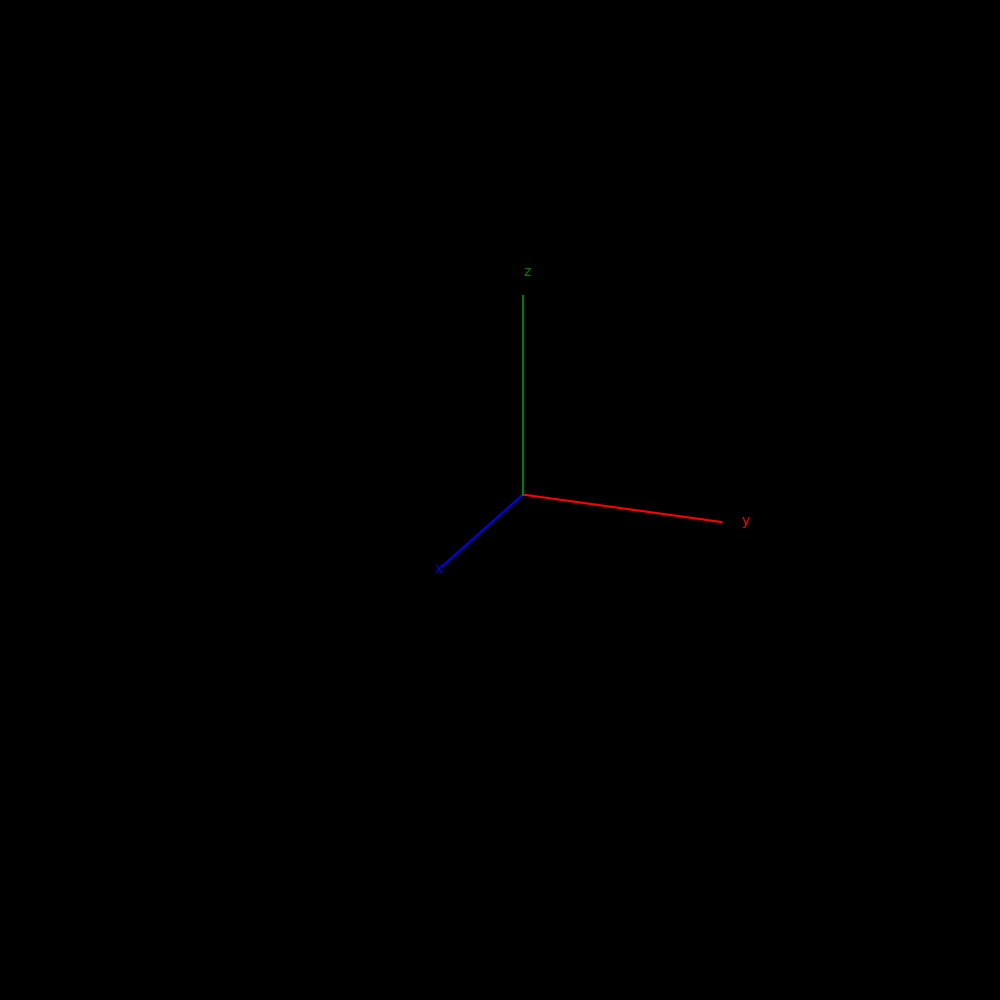

-60 30


In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('dark_background')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
remove_axes(ax)
lim = (-1, 1)
ax.set(xlim=lim, ylim=lim, zlim=lim)

print(ax.azim, ax.elev)

origin = np.array([0,0,0])
ends = np.array([[1,0,0],
                 [0,1,0],
                 [0,0,1]])

colors = ["blue", "red", "green"]
labels = ["x", "y", "z"]

#plot of the initial axes system
for i in range(ends.shape[0]):
    ax.plot(*zip(origin, ends[i]), color=colors[i])
    ax.text(*(11 / 10 * ends[i]), labels[i], color=colors[i])

#plot of rotated axes system
#r_ends = rotate(ends, np.deg2rad(ax.azim), which='z')
#r_ends = rotate(r_ends, -np.deg2rad(ax.elev), which='y')
#r_ends = rotate(r_ends, np.pi/4, which='z')
#for i in range(ends.shape[0]):
#    ax.plot(*zip(origin, r_ends[i]), color=colors[i])
#    ax.text(*(11 / 10 * r_ends[i]), labels[i]+"'", color=colors[i])
    
#plot of rotated axes system
#r_ends = rotate(ends, np.pi/4, which='z')
#r_ends = rotate(r_ends, np.pi/4, which='y')
#r_ends = rotate(r_ends, np.pi/4, which='x')
#for i in range(ends.shape[0]):
#    ax.plot(*zip(origin, r_ends[i]), color=colors[i])
#    ax.text(*(11 / 10 * r_ends[i]), labels[i]+"''", color=colors[i])
    
plt.show()